Number of Protons on Target
===

We are interested in comparing the number of protons on target for the atmospheric beam dump to other more conventional beam dump experiments e.g. MiniBooNE.

MiniBooNE
---

From [Aguilar-Arevalo et al.](http://inspirehep.net/record/1634033), we see that for MiniBooNE, during a dedicated run of $8 \, \mathrm{GeV}$ protons, there were,

$$N_{\mathrm{pot}} = 1.86 \times 10^{20}$$

protons on target. (What was the run length, then can convert to $N_{\mathrm{pot}}/\mathrm{yr.}$?)

Atmospheric Beam Dump
---

For the atmospheric beam dump, we calculate the number of interactions, per second, in the whole atmosphere as follows,

$$N_{\mathrm{pot}} \, [\mathrm{s}^{-1}] = \int{\mathrm{d}E_p \, \frac{\mathrm{d}\phi_p}{\mathrm{d}E_p} \sigma_{pN}(E_p) \times \int_{0}^{h}{\mathrm{d}h \, (R_E + h)^2 \int{\mathrm{d}\Omega \, n_N(h) Y_p(h)}}}$$

Doing the angular integral, this is just,

$$N_{\mathrm{pot}} \, [\mathrm{s}^{-1}] = \int{\mathrm{d}E_p \, \frac{\mathrm{d}\phi_p}{\mathrm{d}E_p} \sigma_{pN}(E_p) \times 2 \pi\int_{0}^{h}{\mathrm{d}h \, (R_E + h)^2 n_N(h) Y_p(h)}}$$

In what follows we take $\sigma_{pN} = 2.55 \times 10^{-25} \, \mathrm{cm}^2$. We can also find the differential number of protons on target per second as,

$$\frac{\mathrm{d}N_{\mathrm{pot}}}{\mathrm{d}E_p} \, [\mathrm{s}^{-1}] = \frac{\mathrm{d}\phi_p}{\mathrm{d}E_p} \sigma_{pN}(E_p) \times 2 \pi\int_{0}^{h}{\mathrm{d}h \, (R_E + h)^2 n_N(h) Y_p(h)}$$

We split the calculation into two, first we calculate the effective atmospheric volume, $V_{\mathrm{eff}}$, defined by,

$$V_{\mathrm{eff}} \cdot n_{N}^0 \equiv 2 \pi\int_{0}^{h}{\mathrm{d}h \, (R_E + h)^2 n_N(h) Y_p(h)}$$

where $n_N^0 = 5 \times 10^{19} \, \mathrm{cm}^{-3}$ is a reference number density taken to be the value at ground level. Then,

$$\frac{\mathrm{d}N_{\mathrm{pot}}}{\mathrm{d}E_p} \, [\mathrm{s}^{-1}] = V_{\mathrm{eff}} \cdot n_{N}^0 \cdot \frac{\mathrm{d}\phi_p}{\mathrm{d}E_p} \sigma_{pN}(E_p)$$

and,

$$N_{\mathrm{pot}} \, [\mathrm{s}^{-1}] = V_{\mathrm{eff}} \cdot n_{N}^0 \cdot \sigma_{pN} \cdot \int{\mathrm{d}E_p \, \frac{\mathrm{d}\phi_p}{\mathrm{d}E_p}}$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings(action='ignore')

from air_density import suppression_factor, rho
from proton_flux import dPhiPatmosdT, Tmin

def Veff(rho_fun, Yp_fun, 
         nN0=5*np.power(10.0, 19), 
         RE=6371.0, 
         hmax=180.0):
    r"""
    Computes Veff given interpolation functions for the number density 
    and suppression factor.
    
    Parameters
    ----------
    rho_fun : function
        function of h [km] that returns the number density 
        per cubic centimetre
    Yp_fun  : function
        suppression factor at a height h [km]
    nN0     : float
        reference number density per cubic centimetre
    RE      : float
        radius of the Earth [km]
    hmax    : float
        integration upper limit [km]
    
    Returns
    -------
    Veff    : float
        the effective atmospheric volume in cubic centimetres
    """
    def integrand_cm(h):
        return 2 * np.pi * np.power(10.0, 5*3) * np.power(RE + h, 2.0) \
                    * rho_fun(h) * Yp_fun(h)
    return (1/nN0)*scipy.integrate.quad(integrand_cm, a=0.0, b=hmax)[0]
    
V0 = Veff(rho, suppression_factor)
print("Effective Volume: {}".format(V0))

Effective Volume: 2.0132560109335485e+23


Running this we find that with the reference density given above,

$$V_{\mathrm{eff}} \simeq 2 \times 10^{23} \, \mathrm{cm}^3$$

We can now find the differential number of protons on target per second by multiplying by the flux,

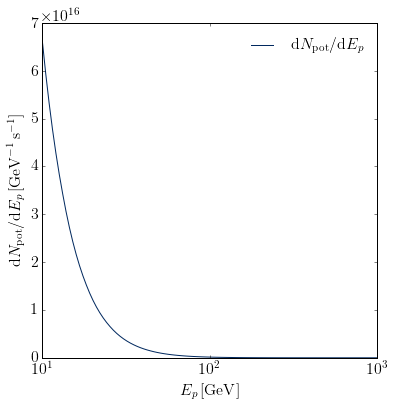

In [2]:
def POT_per_second_per_GeV(Ep, 
                           V0=Veff(rho, suppression_factor), 
                           n0=5*np.power(10.0, 19), 
                           sigmapN0=2.55*np.power(10.0, -25)):
    r"""
    Computes the number of protons on target, per GeV, per second.
    
    Parameters
    ----------
    Ep       : float
        proton energy
    V0       : float
        effective atmospheric volume in cubic centimetres
    n0       : float
        reference number density per cubic centimetre
    sigmapN  : float
        approximate proton-Nitrogen cross section
    
    Returns
    -------
    POT_per_GeV : float
        protons on target per GeV, per second
    """
    return V0 * n0 * sigmapN0 * dPhiPatmosdT(Ep)

T_arr = np.logspace(1, 3)
N_arr = np.empty(len(T_arr))
for idx, T in enumerate(T_arr):
    N_arr[idx] = POT_per_second_per_GeV(T)
plt.figure(figsize=(6,6))
plt.semilogx(T_arr, N_arr, label=r'$\mathrm{d}N_{\mathrm{pot}}/\mathrm{d}E_p$')
plt.xlabel(r'$E_p \, [\mathrm{GeV}]$')
plt.ylabel(r'$\mathrm{d}N_{\mathrm{pot}}/\mathrm{d}E_p \, [\mathrm{GeV}^{-1} \, \mathrm{s}^{-1}]$')
plt.legend()
plt.show()

Finally, we can calculate the number of protons on target, per second, and then relate this to a total number of protons on target for a given experiment.

In [3]:
def POT_per_second(V0=Veff(rho, suppression_factor), 
                   n0=5*np.power(10.0, 19), 
                   sigmapN0=2.55*np.power(10.0, -25)):
    return scipy.integrate.quad(POT_per_second_per_GeV, 
                                a=10.0,
                                b=1000.0)[0]

def POT_per_day():
    return 86400.0*POT_per_second()

print("POT per second: {}".format(POT_per_second()))
print("POT per year: {}".format(POT_per_second()*3.154*10**7))
print("POT (Xenon1T): {}".format(POT_per_day()*278.8))
print("POT (LZ): {}".format(POT_per_day()*1095))

POT per second: 4.374195628748341e+17
POT per year: 1.3796213013072267e+25
POT (Xenon1T): 1.0536702404789125e+25
POT (LZ): 4.138339000446231e+25


So we see that the number of protons on target per year is approximately,

$$N_{\mathrm{pot}} \, [\mathrm{yr}^{-1}] \simeq 1.3 \times 10^{25}$$

Of course, this is much larger than the MiniBooNE equivalent, and illustrates the fact that we lose out based on (i) the branching ratio into dark sector particles, and, (ii) the beam spreading, which is significantly less for a boosted collinear proton beam over $490\, \mathrm{m}$.

Experiments
---

If we now consider some experiments and their exposures, we can calculate the number of protons on target for each run.

| Experiment | Beam Dump | Exposure Time [days] | $N_{\mathrm{pot}}$ | Ref. |
| --- | --- | --- | --- | --- |
| MiniBooNE | Conventional | TBC | $1.86 \times 10^{20}$ | [Aguilar-Arevalo et al.](http://inspirehep.net/record/1634033) | 
| Xenon1T | Atmospheric | 278.8 | $1.05 \times 10^{25}$ | [Aprile et al.](https://inspirehep.net/record/1675772) |
| LZ | Atmospheric | 1095 (projected?) | $4.14 \times 10^{25}$ | [McKinsey et al.](https://inspirehep.net/record/1664178) |